In [ ]:
!pip install music21                  # Biblioteka music21 jest narzędziem do analizy, przetwarzania i generowania muzyki w Pythonie.

In [ ]:
!sudo apt-get update

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [3,448 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,226 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/ma

In [ ]:
!apt-get install -y lilypond          # LilyPond to oprogramowanie do komputerowego składu nut, które umożliwia tworzenie profesjonalnie wyglądających partytur muzycznych.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lmodern fonts-noto-mono fonts-urw-base35 ghostscript
  libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libptexenc1
  libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lilypond-data
  lilypond-fonts lmodern poppler-data t1utils tex-common texlive-base texlive-binaries
  texlive-latex-base xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre ghostscript-x lilypond-doc
  python3-lxml poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho fonts-japanese-gothic
  | fonts-ipafont-gothic fonts-arphic-ukai fonts-arphic-uming fonts-nanum debhelper perl-tk xpdf
  | pdf-viewer xzdec texlive-latex-base-doc
The following NEW packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lmodern

**Biblioteki**

In [ ]:
import os  # Moduł os do interakcji z systemem operacyjnym, np. do pracy z plikami i katalogami.
import zipfile  # Pozwala na otwieranie, tworzenie i rozpakowywanie plików ZIP.
import glob  # Używany do znajdowania plików w systemie za pomocą wzorców, np. *.txt, *.mid.

# Biblioteki do obróbki danych i analizy statystycznej

from collections import Counter  # Do liczenia wystąpień elementów w zbiorach.
import pandas as pd  # Do pracy z danymi w formie tabel, DataFrame.
import numpy as np  # Do operacji na tablicach i macierzach numerycznych.
import time  # Do mierzenia czasu wykonywania kodu.
from math import exp  # Do obliczeń matematycznych, np. przy obliczaniu perplexity.

# Biblioteki do wizualizacji
import matplotlib.pyplot as plt  # Do tworzenia wykresów.
import seaborn as sns  # Do tworzenia zaawansowanych wykresów opartych na matplotlib.
from IPython.display import display, Image, Audio  # Do wyświetlania obrazów i odtwarzania dźwięku w Jupyter Notebook.

# Biblioteki związane z muzyką i formatami muzycznymi
from music21 import converter, instrument, note, chord, stream  # Główne elementy z music21 do pracy z muzyką.
# from music21 import *  # Importuje dodatkowe elementy związane z biblioteką music21, potrzebne do pracy z nutami i akordami.

# Biblioteki do uczenia maszynowego i modelowania
import tensorflow as tf
from tensorflow.keras.utils import to_categorical  # Do konwersji etykiet na one-hot encoding.
from tensorflow.keras.models import Sequential  # Do tworzenia modeli Keras.
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout  # Warstwy do budowy sieci neuronowej.
from tensorflow.keras.optimizers import Adamax  # Optymalizator do treningu modelu.
from sklearn.model_selection import train_test_split  # Do podziału danych na zbiory treningowy i testowy.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # Do oceny jakości modelu.

# Google Colab
from google.colab import drive  # Do montowania Dysku Google w Google Colab.

import warnings

**Załadowanie danych**

In [ ]:
drive.mount('/content/drive')           # Funkcja mount() zamontowuje Dysk Google do określonej ścieżki w systemie plików Colab, w tym przypadku /content/drive.

Mounted at /content/drive


In [ ]:
zip_file_path = '/content/drive/My Drive/music.zip'     # Ustala, gdzie na Dysku Google znajduje się plik ZIP z muzyką, żeby później go użyć.
extract_dir = '/content/drive/My Drive/music'           # Określa, do jakiego folderu mają zostać wypakowane pliki z tego ZIP-a.

In [ ]:
os.makedirs(extract_dir, exist_ok=True)                 # Tworzy folder, w którym pliki ZIP zostaną rozpakowane, jeśli ten folder jeszcze nie istnieje.

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:    # Otwiera plik ZIP do odczytu i nadaje mu nazwę zip_ref na czas pracy z tym plikiem.
    zip_ref.extractall(extract_dir)                     # Rozpakowuje wszystkie pliki z ZIP-a do wcześniej utworzonego folderu.

In [ ]:
file_path = extract_dir + "/music/chopin/"                    # Służy do stworzenia ścieżki do konkretnego folderu lub pliku wewnątrz wcześniej rozpakowanego katalogu.

In [ ]:
print(os.path.abspath(extract_dir))

/content/drive/My Drive/music


In [ ]:
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [ ]:
midi_files = []                                         # Stworzenie listy do przechowywania plików MIDI.

for midi_path in glob.glob(os.path.join(file_path, '*.mid')):   # Szuka wszystkich plików MIDI w danym folderze.
    midi_score = converter.parse(midi_path)                     # Otwiera każdy znaleziony plik MIDI i przekształca jego zawartość na obiekt Stream lub Score z biblioteki music21,
                                                                # który zawiera wszystkie nuty, akordy i inne informacje muzyczne z pliku, które można łatwo analizować.
    midi_files.append(midi_score)                               # Dodaje otwarty plik MIDI do listy, żeby mieć je wszystkie w jednym miejscu.

print(f"Handled {len(midi_files)} MIDI format files.")

Handled 48 MIDI format files.


In [ ]:
def gather_pitches(files):
    pitch_collection = []

    for midi_file in files:
        # Podział na instrumenty, jak w kodzie 1
        instrument_parts = instrument.partitionByInstrument(midi_file)

        # Iteracja przez każdą partię
        for part in instrument_parts.parts:
            for element in part.recurse():  # Rekurencja przez wszystkie elementy
                if isinstance(element, note.Note):
                    pitch_collection.append(str(element.pitch))  # Nuty jako nazwy dźwięków
                elif isinstance(element, chord.Chord):
                    pitch_collection.append(".".join(str(n) for n in element.normalOrder))  # Akordy jako numeryczna reprezentacja

    return pitch_collection

# Wyodrębnienie wszystkich nut z listy plików MIDI
pitches_dataset = gather_pitches(midi_files)
print(f"Liczba dźwięków zawartych w plikach MIDI w zbiorze: {len(pitches_dataset)}")

Liczba dźwięków zawartych w plikach MIDI w zbiorze: 57894


In [ ]:
print("First fifty values in the Corpus:", pitches_dataset[:50])

First fifty values in the Corpus: ['7.0', 'G3', '0.4', 'E3', '0.4.7', 'A4', '9.11', 'A4', 'G3', '5.7', '2.5', '2.5.7', 'A4', '9.0', 'A4', 'G3', '4.7', '0.4', '0.4.7', 'A4', '4.9', 'A4', 'B3', '4.7', '4.7', '4.7.11', 'C5', '0.5', 'E4', '4.9', '9.0', '9.0.4', '2', '2.6', 'E4', '9.0', 'C4', '9.0.4', '2', '5.7', 'E4', '7.11', 'B3', '4.7.11', '2', '2', '7', 'B3', '2.5', 'F3']


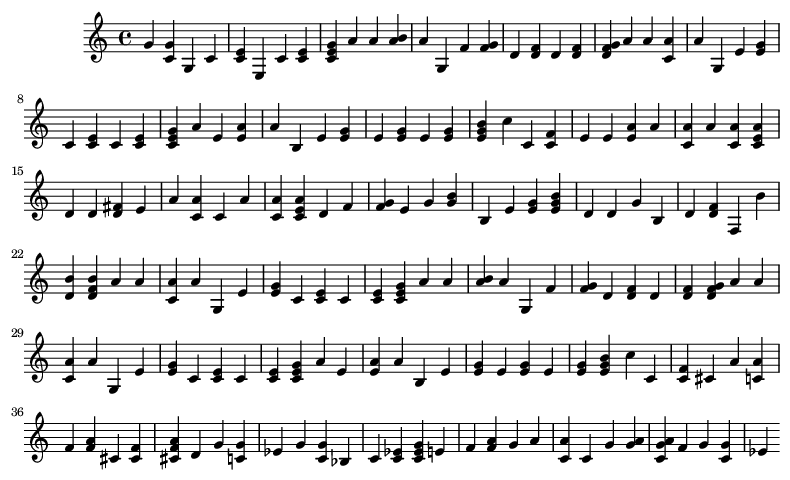

In [ ]:
# Funkcja do wizualizacji muzyki
def show(score):
    img_path = score.write('lily.png')  # Zapisuje muzykę jako obrazek o nazwie lily.png
    display(Image(img_path))  # Wyświetla obrazek w notatniku Jupyter

def create_melody(pitch_sequence):
    musical_elements = []
    time_position = 0  # Zmienna do kontrolowania czasu pomiędzy nutami/akordami

    for element in pitch_sequence:
        # Sprawdzamy, czy element jest akordem
        if "." in element or element.isdigit():  # Jeżeli zawiera kropkę (akord) lub jest liczbą (wartość MIDI)
            note_indices = element.split(".")
            chord_notes = []

            for i in note_indices:
                inst_note=int(i)
                note_snip = note.Note(inst_note)
                chord_notes.append(note_snip)
                chord_snip = chord.Chord(chord_notes)
                chord_snip.offset = time_position
                musical_elements.append(chord_snip)
        # pattern is a note
        else:
            note_snip = note.Note(element)
            note_snip.offset = time_position
            musical_elements.append(note_snip)
        # increase offset each iteration so that notes do not stack

        time_position += 1  # Zwiększamy czas pomiędzy nutami/akordami

    return stream.Stream(musical_elements)

# Tworzenie melodii z pierwszych 100 dźwięków z Corpusu
melody_segment = create_melody(pitches_dataset[:100])  # Tworzy melodię z pierwszych 100 dźwięków w pitches_dataset
show(melody_segment)  # Wyświetla melodię

In [ ]:
note_count = Counter(pitches_dataset)   # Tworzy obiekt typu Counter - tablica - który zlicza wystąpienia każdego elementu w pitches_dataset i zapisuje wynik w zmiennej
# WYNIK:  Counter({'C': 3, 'D': 2, 'E': 1})
print("Total distinct notes in the dataset:", len(note_count)) # Wyświetla liczbę unikalnych elementów (dźwięków) w note_count, czyli liczbę różnych dźwięków w zbiorze danych., tablicy.
# WYNIK:  3 (bo 'C', 'D', i 'E').

Total distinct notes in the dataset: 397


In [ ]:
# Eksploracja słownika nut
notes_list = list(note_count.keys())  # Pobiera listę unikalnych dźwięków (kluczy) z note_count
recurrence_list = list(note_count.values())  # Pobiera listę liczby wystąpień (wartości) z note_count

# Obliczanie średniej częstotliwości wystąpień dźwięków
def calculate_average(lst):
    return sum(lst) / len(lst) if lst else 0  # Warunek zabezpieczający przed dzieleniem przez zero

# Średnia liczba wystąpień dźwięków
average_recurrence = calculate_average(recurrence_list)
print(f"Średnia liczba wystąpień dźwięku w zbiorze danych: {average_recurrence:.2f}")

# Najczęściej i najrzadziej występujące dźwięki
most_frequent_count = max(recurrence_list)  # Maksymalna liczba wystąpień
least_frequent_count = min(recurrence_list)  # Minimalna liczba wystąpień

# Mapowanie do odpowiednich nut
most_frequent_note = notes_list[recurrence_list.index(most_frequent_count)]  # Znajduje nutę o maksymalnej liczbie wystąpień
least_frequent_note = notes_list[recurrence_list.index(least_frequent_count)]  # Znajduje nutę o minimalnej liczbie wystąpień

# Wyświetlanie wyników
print(f"Najczęściej występujący dźwięk to '{most_frequent_note}', pojawił się {most_frequent_count} razy")
print(f"Najrzadziej występujący dźwięk to '{least_frequent_note}', pojawił się {least_frequent_count} razy")


Średnia liczba wystąpień dźwięku w zbiorze danych: 145.83
Najczęściej występujący dźwięk to 'G#3', pojawił się 1627 razy
Najrzadziej występujący dźwięk to '11.0.3', pojawił się 1 razy


In [ ]:
# Lista rzadkich nut (działa jak w kodzie 1)
rare_notes = []

# Iteracja przez słownik `note_count` w celu zebrania nut występujących mniej niż 100 razy
for key, value in note_count.items():
    if value < 100:
        rare_notes.append(key)

# Wyświetlenie liczby rzadkich nut
print("Total number of notes that occur less than 100 times:", len(rare_notes))

# Usuwanie rzadkich nut z pitches_dataset (modyfikacja w miejscu, jak w kodzie 1)
for element in pitches_dataset:
    if element in rare_notes:
        pitches_dataset.remove(element)

# Wyświetlenie długości listy po usunięciu rzadkich nut
print("Length of Corpus after eliminating the rare notes:", len(pitches_dataset))


Total number of notes that occur less than 100 times: 270
Length of Corpus after eliminating the rare notes: 53746


In [ ]:
# Tworzenie listy unikalnych symboli występujących w zbiorze przy użyciu funkcji set() (usunięcie duplikatów).
unique_notes = sorted(list(set(pitches_dataset)))

Length_pitches_dataset = len(pitches_dataset) # Obliczana jest długość zbioru (czyli całkowita liczba symboli w danych wejściowych) i zapisywana w zmiennej
Length_unique_notes = len(unique_notes) # Obliczana jest liczba unikalnych symboli w zbiorze i zapisywana w zmiennej

note_to_int = dict((s, i) for i, s in enumerate(unique_notes))  # Tworzenie słownika, który mapuje każdy symbol s w symb na unikalny indeks liczbowy i.
int_to_note = dict((i, s) for i, s in enumerate(unique_notes))  # Tworzenie odwrotnego słownika, który mapuje indeks liczbowy i na odpowiadający mu symbol s.


print("Total number of characters:", Length_pitches_dataset)
print("Number of unique characters:", Length_unique_notes)

Total number of characters: 53746
Number of unique characters: 256


In [ ]:
print(note_to_int)
print(int_to_note)

{'0': 0, '0.1': 1, '0.2': 2, '0.2.5': 3, '0.2.6': 4, '0.2.6.8': 5, '0.3': 6, '0.3.5': 7, '0.3.6': 8, '0.3.6.9': 9, '0.3.7': 10, '0.4': 11, '0.4.5': 12, '0.4.6': 13, '0.4.7': 14, '0.5': 15, '0.5.6': 16, '0.6': 17, '1': 18, '1.2': 19, '1.2.3': 20, '1.2.4.8': 21, '1.3': 22, '1.3.6': 23, '1.3.7': 24, '1.3.8': 25, '1.4': 26, '1.4.6': 27, '1.4.7': 28, '1.4.7.10': 29, '1.5': 30, '1.5.6': 31, '1.5.8': 32, '1.6': 33, '1.7': 34, '10': 35, '10.0': 36, '10.0.3.6': 37, '10.0.4': 38, '10.0.5': 39, '10.1': 40, '10.1.3': 41, '10.1.4': 42, '10.1.5': 43, '10.11': 44, '10.11.2': 45, '10.2': 46, '10.2.5': 47, '10.3': 48, '11': 49, '11.0': 50, '11.0.2': 51, '11.0.2.3': 52, '11.0.4': 53, '11.1': 54, '11.1.6': 55, '11.2': 56, '11.2.5': 57, '11.2.6': 58, '11.3': 59, '11.3.4': 60, '11.3.5': 61, '11.3.6': 62, '11.4': 63, '2': 64, '2.3': 65, '2.4': 66, '2.4.5': 67, '2.4.7': 68, '2.4.8': 69, '2.5': 70, '2.5.7': 71, '2.5.8': 72, '2.5.9': 73, '2.6': 74, '2.6.8': 75, '2.7': 76, '2.8': 77, '3': 78, '3.4': 79, '3.5': 

In [ ]:
sequence_length = 40  # Długość sekwencji wejściowej (identyczna jak w kodzie 1)
features = []  # Lista na sekwencje wejściowe
targets = []  # Lista na wartości docelowe

# Iteracja przez korpus w celu wygenerowania sekwencji i wartości docelowych
for i in range(0, Length_pitches_dataset - sequence_length, 1):  # Iterujemy przez korpus tak, aby każda sekwencja miała długość równą sequence_length
    sequence_in = pitches_dataset[i:i + sequence_length]  # Wyciągamy sekwencję o długości sequence_length
    sequence_out = pitches_dataset[i + sequence_length]  # Pobieramy wartość docelową (nutę, która następuje po sekwencji)

    # Zamieniamy sekwencję wejściową i wartość docelową na odpowiadające im indeksy numeryczne
    numeric_sequence_in = [note_to_int[i] for i in sequence_in]  # Mapujemy symbole w sekwencji wejściowej na liczby
    numeric_sequence_out = note_to_int[sequence_out]  # Mapujemy wartość docelową na liczbę

    # Dodajemy zmapowane dane do odpowiednich list
    features.append(numeric_sequence_in)  # Dodajemy zmapowaną sekwencję wejściową
    targets.append(numeric_sequence_out)  # Dodajemy zmapowaną wartość docelową

# Obliczenie liczby punktów danych
num_datapoints = len(targets)  # Liczymy liczbę par "cecha-wartość docelowa"

# Wyświetlenie informacji o liczbie sekwencji
print("Total number of sequences in the Corpus:", num_datapoints)

Total number of sequences in the Corpus: 53706


In [ ]:
# Konwersja do tablicy numpy, dodanie wymiaru i normalizacja
X = np.expand_dims(np.array(features), axis=-1) / Length_unique_notes

# np.array(features): Bierzemy naszą listę liczb (features) i zamieniamy ją na wygodną formę, jakbyśmy układali liczby w tabeli.
# np.expand_dims(..., axis=-1): Dodajemy dodatkowe miejsce w tej tabeli, jakbyśmy dodali nową kolumnę, aby tabela miała odpowiedni kształt.
# / count_unique_notes: Dzielimy wszystkie liczby w tabeli przez całkowitą liczbę różnych nut, aby zmienić je na mniejsze liczby między 0 a 1. To jak podzielenie wielkiej
# porcji na małe kawałki, żeby wszystko mieściło się w jednym pudełku

# One-hot encoding zmiennej wyjściowej
y = to_categorical(targets, num_classes=Length_unique_notes)

# to_categorical(targets, num_classes=count_unique_notes): Zamieniamy nasze liczby (targets) na specjalny kod, gdzie każda liczba ma swoją osobną szufladkę.
# Jeśli mamy na przykład 5 różnych nut, każda nuta dostaje swoje własne miejsce w tej szufladce, a wszystkie inne miejsca są puste (z 0). To pomaga komputerowi
# lepiej zrozumieć, którą nutę chcemy wybrać, bo każda nuta ma swoje własne miejsce.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Model i kompilacja
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.3))
#model.add(LSTM(64, return_sequences=True))
#model.add(Dropout(0.3))
model.add(LSTM(128))
model.add(Dense(64))
model.add(Dropout(0.3))
model.add(Dense(y_train.shape[1], activation='softmax'))

opt = Adamax(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Rozpocznij pomiar czasu
start_time = time.time()

# Trening modelu
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    batch_size=128,
                    epochs=10)

# Zakończ pomiar czasu
end_time = time.time()
training_time = end_time - start_time


Epoch 1/10
315/315 ━━━━━━━━━━━━━━━━━━━━ 89s 271ms/step - accuracy: 0.0238 - loss: 4.7673 - val_accuracy: 0.0336 - val_loss: 4.4942
Epoch 2/10
315/315 ━━━━━━━━━━━━━━━━━━━━ 142s 272ms/step - accuracy: 0.0326 - loss: 4.4737 - val_accuracy: 0.0369 - val_loss: 4.4863
Epoch 3/10
315/315 ━━━━━━━━━━━━━━━━━━━━ 141s 268ms/step - accuracy: 0.0374 - loss: 4.4544 - val_accuracy: 0.0380 - val_loss: 4.4429
Epoch 4/10
315/315 ━━━━━━━━━━━━━━━━━━━━ 143s 270ms/step - accuracy: 0.0354 - loss: 4.4331 - val_accuracy: 0.0384 - val_loss: 4.4749
Epoch 5/10
315/315 ━━━━━━━━━━━━━━━━━━━━ 142s 272ms/step - accuracy: 0.0362 - loss: 4.4314 - val_accuracy: 0.0376 - val_loss: 4.4312
Epoch 6/10
315/315 ━━━━━━━━━━━━━━━━━━━━ 142s 271ms/step - accuracy: 0.0383 - loss: 4.4128 - val_accuracy: 0.0394 - val_loss: 4.4147
Epoch 7/10
315/315 ━━━━━━━━━━━━━━━━━━━━ 82s 260ms/step - accuracy: 0.0408 - loss: 4.3865 - val_accuracy: 0.0411 - val_loss: 4.4088
Epoch 8/10
315/315 ━━━━━━━━━━━━━━━━━━━━ 85s 269ms/step - accuracy: 0.0419 - lo

In [ ]:
# metryki modelu
from scipy.stats import entropy
from sklearn.metrics import confusion_matrix
from sklearn.metrics.pairwise import cosine_similarity

def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    return accuracy, precision, recall, f1

# Prognozy na zbiorze testowym
y_pred_test = model.predict(X_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_true_test_classes = np.argmax(y_test, axis=1)

# Prognozy na zbiorze treningowym
y_pred_train = model.predict(X_train)
y_pred_train_classes = np.argmax(y_pred_train, axis=1)
y_true_train_classes = np.argmax(y_train, axis=1)

# Oblicz metryki
accuracy_test, precision_test, recall_test, f1_test = calculate_metrics(y_true_test_classes, y_pred_test_classes)
accuracy_train, precision_train, recall_train, f1_train = calculate_metrics(y_true_train_classes, y_pred_train_classes)


def perplexity(y_true_onehot, y_pred):
    # Zakładamy, że y_true jest one-hot encoded (tak jak y_test)
    loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
    loss = loss_fn(y_true_onehot, y_pred).numpy()  # Wylicz stratę crossentropy
    return np.exp(loss)

perplexity_test = perplexity(y_test, y_pred_test)
perplexity_train = perplexity(y_train, y_pred_train)


# Dodajemy ostateczną wartość straty dla zbioru treningowego i walidacyjnego
final_loss_train = history.history['loss'][-1]
final_loss_test = history.history['val_loss'][-1]

# Funkcja do obliczania n-gramów w sekwencji
def n_gram_analysis(sequence, n):
    ngrams = zip(*[sequence[i:] for i in range(n)])
    counts = Counter(ngrams)
    return counts

#-----------------------------------------------------------------------------------------------------------------------------------------------------------
# Funkcja porównująca n-gramy z danymi uczącymi
def compare_n_grams(y_train, y_pred, n):
    # Analiza n-gramów w zbiorze uczącym
    n_gram_counts_train = n_gram_analysis(y_train, n)

    # Analiza n-gramów w przewidywaniach modelu
    n_gram_counts_pred = n_gram_analysis(y_pred, n)

    # Zwracamy wyniki
    return n_gram_counts_train, n_gram_counts_pred

# Funkcja do obliczania podobieństwa kosinusowego pomiędzy wektorami n-gramów
def compare_n_grams_cosine(y_train, y_pred, n):
    n_gram_counts_train, n_gram_counts_pred = compare_n_grams(y_train, y_pred, n)

    # Przygotowanie wektorów częstości n-gramów
    all_ngrams = list(set(n_gram_counts_train.keys()).union(set(n_gram_counts_pred.keys())))

    vec_train = np.array([n_gram_counts_train.get(ngram, 0) for ngram in all_ngrams])
    vec_pred = np.array([n_gram_counts_pred.get(ngram, 0) for ngram in all_ngrams])

    # Obliczenie podobieństwa kosinusowego
    similarity = cosine_similarity([vec_train], [vec_pred])[0][0]

    return similarity

# Przykład analizy n-gramów (bigramów)
n = 2  # dla bigramów

# Analiza n-gramów dla zbioru uczącego i przewidywań modelu (zbiór treningowy)
n_gram_counts_train, n_gram_counts_train_pred = compare_n_grams(y_train.argmax(axis=1), y_pred_train.argmax(axis=1), n)

# Analiza n-gramów dla zbioru testowego i przewidywań modelu (zbiór testowy)
n_gram_counts_test, n_gram_counts_test_pred = compare_n_grams(y_test.argmax(axis=1), y_pred_test.argmax(axis=1), n)

# Można obliczyć podobieństwo kosinusowe między n-gramami w zbiorze uczącym a przewidywaniami modelu:
similarity_train = compare_n_grams_cosine(y_train.argmax(axis=1), y_pred_train.argmax(axis=1), n)
similarity_test = compare_n_grams_cosine(y_test.argmax(axis=1), y_pred_test.argmax(axis=1), n)

'''
# Wyświetlanie wyników
print("\nWyniki dla zbioru treningowego:")
print(f"Loss: {final_loss_train:.4f}")
print(f"Perplexity: {perplexity_train:.4f}")
print(f"Accuracy: {accuracy_train:.4f}")
print(f"F1-Score: {f1_train:.4f}")
print(f"Precision: {precision_train:.4f}")
print(f"Recall: {recall_train:.4f}")

print(f"Czas wykonywania treningu: {training_time:.2f} sekund")

print("Wyniki dla zbioru testowego:")
print(f"Loss: {final_loss_test:.4f}")
print(f"Perplexity: {perplexity_test:.4f}")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"F1-Score: {f1_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
'''
#-------------------------------------------------------------------------------------------------------------------------------------------------------------

420/420 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step
1259/1259 ━━━━━━━━━━━━━━━━━━━━ 51s 40ms/step


'\n# Wyświetlanie wyników\nprint("\nWyniki dla zbioru treningowego:")\nprint(f"Loss: {final_loss_train:.4f}")\nprint(f"Perplexity: {perplexity_train:.4f}")\nprint(f"Accuracy: {accuracy_train:.4f}")\nprint(f"F1-Score: {f1_train:.4f}")\nprint(f"Precision: {precision_train:.4f}")\nprint(f"Recall: {recall_train:.4f}")\n\nprint(f"Czas wykonywania treningu: {training_time:.2f} sekund")\n\nprint("Wyniki dla zbioru testowego:")\nprint(f"Loss: {final_loss_test:.4f}")\nprint(f"Perplexity: {perplexity_test:.4f}")\nprint(f"Accuracy: {accuracy_test:.4f}")\nprint(f"F1-Score: {f1_test:.4f}")\nprint(f"Precision: {precision_test:.4f}")\nprint(f"Recall: {recall_test:.4f}")\n'

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 40, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 40, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          16,640 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,122 (2.55 MB)

 Trainable params: 223,040 (871.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 446,082 (1.70 MB)

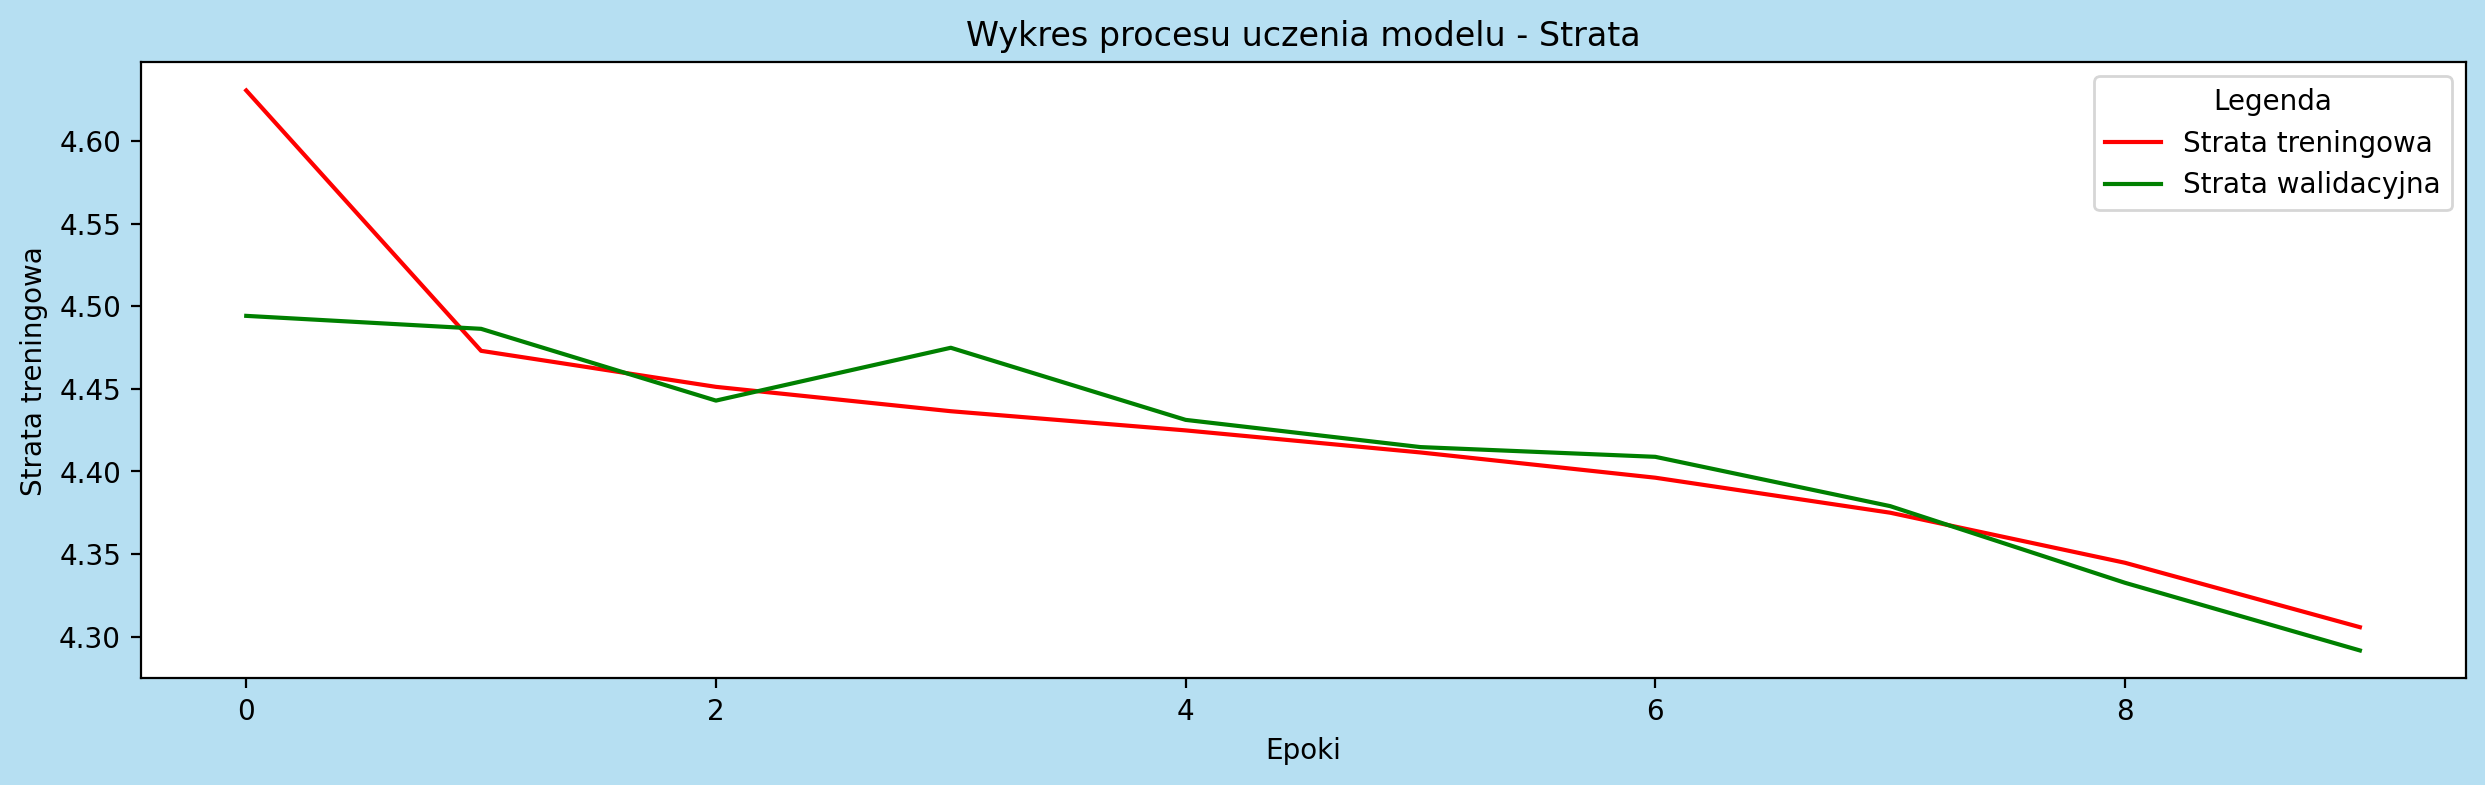

In [ ]:
# Tworzenie wykresu dla procesu uczenia się modelu
history_df = pd.DataFrame(history.history)
plt.figure(figsize=(15, 4), facecolor="#b6dff2")
plt.title("Wykres procesu uczenia modelu - Strata")

# Rysowanie wykresu dla straty treningowej
sns.lineplot(data=history_df["loss"], color="red", label="Strata treningowa")
sns.lineplot(data=history_df["val_loss"], color="green", label="Strata walidacyjna")

plt.ylabel("Strata treningowa")
plt.xlabel("Epoki")

# Dodanie legendy
plt.legend(title="Legenda", loc="upper right")

# Wyświetlenie wykresu
plt.show()

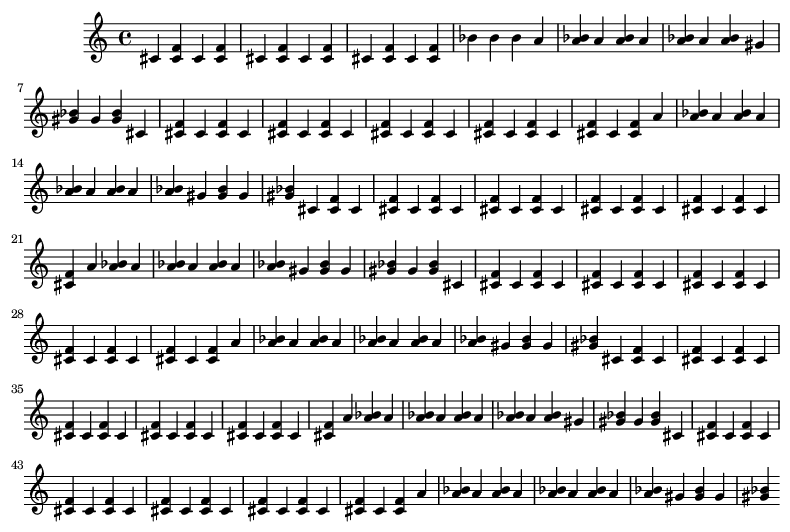

In [61]:
#generowanie midi do analizy

def Malody_Generator(Note_Count):
    seed = X_test[np.random.randint(0, len(X_test) - 1)]
    Music = []
    Notes_Generated = []

    for i in range(Note_Count):
        seed = seed.reshape(1, sequence_length, 1)
        prediction = model.predict(seed, verbose=0)[0]
        prediction = np.log(prediction) / 1.0  # diversity
        exp_preds = np.exp(prediction)
        prediction = exp_preds / np.sum(exp_preds)
        index = np.argmax(prediction)
        index_N = index / float(Length_unique_notes)
        Notes_Generated.append(index)

        # Convert generated note indices into actual note names or MIDI values
        note_name = int_to_note.get(index, None)  # Safely get the note name using int_to_note mapping

        if note_name:  # Check if a valid note name exists
            Music.append(note_name)  # Append the note name
        else:
            print(f"Invalid index {index} generated, skipping...")

        seed = np.insert(seed[0], len(seed[0]), index_N)
        seed = seed[1:]

    # Convert Music (list of notes) to melody
    Melody = create_melody(Music)
    Melody_midi = stream.Stream(Melody)

    return Music, Melody_midi

#getting the Notes and Melody created by the model
Music_notes, Melody = Malody_Generator(100)
show(Melody)

In [93]:
from music21 import stream, note, tempo

note_duration_map = {
    'bardzo wolne': 4,       # Cała nuta = 4 ćwierćnuty
    'wolne': 2,        # Półnuta = 2 ćwierćnuty
    'umiarkowane': 1,     # Ćwierćnuta = 1 ćwierćnuty
    'szybkie': 0.5,    # Ósemka = 0.5 ćwierćnuty
    'bardzo szybkie': 0.25 # Szesnastka = 0.25 ćwierćnuty
}

def Malody_Generator(duration_seconds, note_type='umiarkowane', bpm=60):
    """
    Generowanie melodii o określonym czasie trwania i typie nuty.
    """
    # Czas trwania jednej ćwierćnuty w sekundach
    quarter_duration_seconds = 60 / bpm

    # Liczba ćwierćnut w melodii
    total_quarter_notes = duration_seconds / quarter_duration_seconds

    # Czas trwania jednej nuty w ćwierćnutach
    note_duration = note_duration_map[note_type]

    # Liczba nut
    note_count = int(total_quarter_notes / note_duration)

    # Tworzenie listy nut (zapisujemy nazwę nuty oraz jej czas trwania)
    Music = []
    Notes_Generated = []

    seed = X_test[np.random.randint(0, len(X_test) - 1)]  # Możesz to dostosować do swojego modelu

    for i in range(note_count):
        seed = seed.reshape(1, sequence_length, 1)
        prediction = model.predict(seed, verbose=0)[0]
        prediction = np.log(prediction) / 1.0  # Różnorodność
        exp_preds = np.exp(prediction)
        prediction = exp_preds / np.sum(exp_preds)
        index = np.argmax(prediction)
        index_N = index / float(Length_unique_notes)
        Notes_Generated.append(index)

        # Konwersja indeksu na nazwę nuty
        note_name = int_to_note.get(index, None)

        # Jeśli nuta jest nieprawidłowa, generujemy następną
        while note_name is None or not valid_note_name(note_name):
            index = np.random.randint(0, Length_unique_notes)  # Nowy losowy indeks
            note_name = int_to_note.get(index, None)  # Nowa nuta

        # Dodajemy poprawną nutę do listy
        Music.append((note_name, note_duration))

        seed = np.insert(seed[0], len(seed[0]), index_N)
        seed = seed[1:]

    # Tworzymy melodię używając funkcji create_melody
    Melody = create_melody(Music)

    # Tworzymy strumień MIDI
    Melody_midi = stream.Stream(Melody)

    # Dodajemy tempo na początku
    tempo_mark = tempo.MetronomeMark(number=bpm)
    Melody_midi.insert(0, tempo_mark)

    # Debugowanie
    total_duration = sum(n.quarterLength for n in Melody_midi.notes) * quarter_duration_seconds
    print(f"Total duration of melody (in seconds): {total_duration:.2f}")

    return Music, Melody_midi

def valid_note_name(note_name):
    """
    Sprawdza, czy wygenerowana nuta jest poprawna.
    Możemy tutaj dodać dodatkowe sprawdzenie poprawności zapisu.
    """
    try:
        n = note.Note(note_name)  # Próba utworzenia nuty z nazwy
        return True
    except:
        return False


IntSlider(value=20, continuous_update=False, description='Czas trwania (s):', max=60, min=1, style=SliderStyle…

Dropdown(description='Tempo:', index=2, layout=Layout(height='30px', margin='0px 0px 0px 58px', width='220px')…

Button(button_style='success', description='Generuj Melodie', layout=Layout(height='30px', margin='10px 0px 0p…

Total duration of melody (in seconds): 36.00


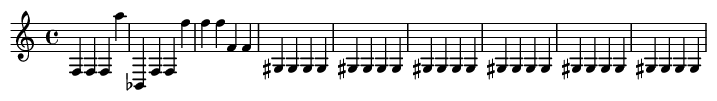

[('F3', 1), ('F3', 1), ('F3', 1), ('A5', 1), ('B-2', 1), ('F3', 1), ('F3', 1), ('F5', 1), ('F5', 1), ('F5', 1), ('F4', 1), ('F4', 1), ('G#3', 1), ('G#3', 1), ('G#3', 1), ('G#3', 1), ('G#3', 1), ('G#3', 1), ('G#3', 1), ('G#3', 1), ('G#3', 1), ('G#3', 1), ('G#3', 1), ('G#3', 1), ('G#3', 1), ('G#3', 1), ('G#3', 1), ('G#3', 1), ('G#3', 1), ('G#3', 1), ('G#3', 1), ('G#3', 1), ('G#3', 1), ('G#3', 1), ('G#3', 1), ('G#3', 1)]
Total duration of melody (in seconds): 36.00


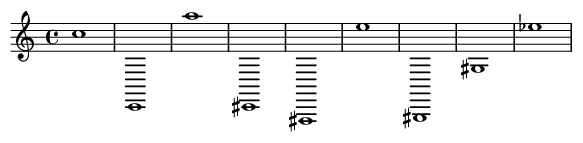

[('C5', 4), ('C2', 4), ('A5', 4), ('C#2', 4), ('F#1', 4), ('E5', 4), ('G#1', 4), ('G#3', 4), ('E-5', 4)]
Total duration of melody (in seconds): 36.00


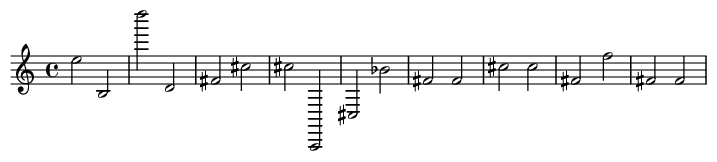

[('E5', 2), ('B3', 2), ('D7', 2), ('D4', 2), ('F#4', 2), ('C#5', 2), ('C#5', 2), ('A1', 2), ('C#3', 2), ('B-4', 2), ('F#4', 2), ('F#4', 2), ('C#5', 2), ('C#5', 2), ('F#4', 2), ('F5', 2), ('F#4', 2), ('F#4', 2)]
Total duration of melody (in seconds): 36.00


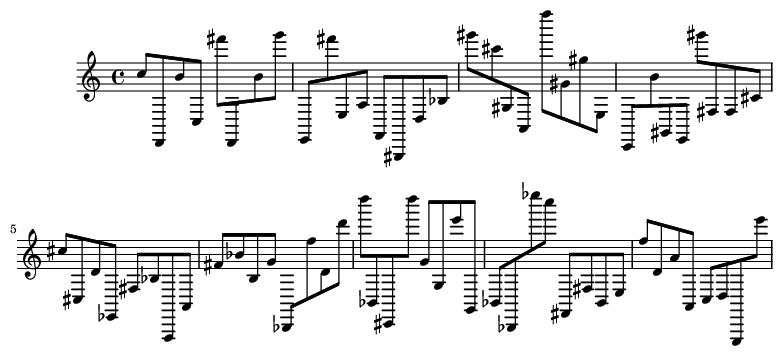

[('C5', 0.5), ('D2', 0.5), ('B4', 0.5), ('C3', 0.5), ('F#6', 0.5), ('D2', 0.5), ('B4', 0.5), ('G6', 0.5), ('E2', 0.5), ('F#6', 0.5), ('E3', 0.5), ('A3', 0.5), ('F2', 0.5), ('G#1', 0.5), ('D3', 0.5), ('B-3', 0.5), ('G#6', 0.5), ('C#6', 0.5), ('G#3', 0.5), ('A2', 0.5), ('F7', 0.5), ('G#4', 0.5), ('G#5', 0.5), ('E3', 0.5), ('C2', 0.5), ('B4', 0.5), ('G#2', 0.5), ('E2', 0.5), ('G#6', 0.5), ('F#3', 0.5), ('F#3', 0.5), ('C#4', 0.5), ('C#5', 0.5), ('C#3', 0.5), ('D4', 0.5), ('E-2', 0.5), ('F#3', 0.5), ('B-3', 0.5), ('F1', 0.5), ('A2', 0.5), ('F#4', 0.5), ('B-4', 0.5), ('B3', 0.5), ('G4', 0.5), ('B-1', 0.5), ('F5', 0.5), ('D4', 0.5), ('D6', 0.5), ('D7', 0.5), ('B-2', 0.5), ('C#2', 0.5), ('D7', 0.5), ('G4', 0.5), ('G3', 0.5), ('E6', 0.5), ('G2', 0.5), ('B-2', 0.5), ('B-1', 0.5), ('E-7', 0.5), ('C7', 0.5), ('F#2', 0.5), ('F#3', 0.5), ('B-2', 0.5), ('E3', 0.5), ('F5', 0.5), ('D4', 0.5), ('A4', 0.5), ('A2', 0.5), ('C3', 0.5), ('D3', 0.5), ('E1', 0.5), ('E6', 0.5)]
Total duration of melody (in seco

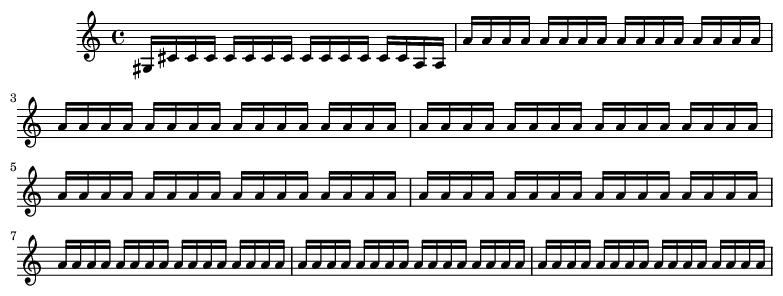

[('G#3', 0.25), ('C#4', 0.25), ('C#4', 0.25), ('C#4', 0.25), ('C#4', 0.25), ('C#4', 0.25), ('C#4', 0.25), ('C#4', 0.25), ('C#4', 0.25), ('C#4', 0.25), ('C#4', 0.25), ('C#4', 0.25), ('C#4', 0.25), ('C#4', 0.25), ('A3', 0.25), ('A3', 0.25), ('A4', 0.25), ('A4', 0.25), ('A4', 0.25), ('A4', 0.25), ('A4', 0.25), ('A4', 0.25), ('A4', 0.25), ('A4', 0.25), ('A4', 0.25), ('A4', 0.25), ('A4', 0.25), ('A4', 0.25), ('A4', 0.25), ('A4', 0.25), ('A4', 0.25), ('A4', 0.25), ('A4', 0.25), ('A4', 0.25), ('A4', 0.25), ('A4', 0.25), ('A4', 0.25), ('A4', 0.25), ('A4', 0.25), ('A4', 0.25), ('A4', 0.25), ('A4', 0.25), ('A4', 0.25), ('A4', 0.25), ('A4', 0.25), ('A4', 0.25), ('A4', 0.25), ('A4', 0.25), ('A4', 0.25), ('A4', 0.25), ('A4', 0.25), ('A4', 0.25), ('A4', 0.25), ('A4', 0.25), ('A4', 0.25), ('A4', 0.25), ('A4', 0.25), ('A4', 0.25), ('A4', 0.25), ('A4', 0.25), ('A4', 0.25), ('A4', 0.25), ('A4', 0.25), ('A4', 0.25), ('A4', 0.25), ('A4', 0.25), ('A4', 0.25), ('A4', 0.25), ('A4', 0.25), ('A4', 0.25), ('A4'

In [ ]:
import ipywidgets as widgets
from IPython.display import display, Audio

output_directory = '/content/drive/My Drive/wygenerowane'

# Upewnienie się, że katalog istnieje
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Zmienna śledząca numer pliku
file_counter = 1

# Funkcja do generowania melodii z inputu użytkownika
def generate_melody(duration_seconds, note_type):
    global file_counter

    Music_notes, Melody = Malody_Generator(duration_seconds=duration_seconds, note_type=note_type)

    # Generowanie nazwy pliku
    output_filename = f'{file_counter}.mid'
    output_filepath = os.path.join(output_directory, output_filename)

    # Zapisz plik MIDI
    Melody.write('midi', output_filepath)

    # Zwiększ numerację pliku
    file_counter += 1

    # Opcjonalnie: Wyświetlenie wygenerowanej melodii
    show(Melody)

    # Możesz dodać tutaj również informacje o nutach:
    print(Music_notes)

# Ustawienia interfejsu
duration_slider = widgets.IntSlider(
    value=20,  # Domyślny czas trwania
    min=1,
    max=60,
    step=1,
    description='Duration (s):',
    continuous_update=False,
    style={'description_width': 'initial', 'width': '400px'},  # Ustawiamy szerokość suwaka
)

note_dropdown = widgets.Dropdown(
    options=['very slow', 'slow', 'moderate', 'fast', 'very fast'],
    value='moderate',
    description='Tempo:',
    disabled=False,
    style={'description_width': 'initial', 'width': '220px'},  # Ustawiamy szerokość rozwijanej listy
    layout=widgets.Layout(margin='0px 0px 0px 58px', width='220px', height='30px')  # Przesunięcie w lewo, aby wyrównać
)

# Funkcja uruchamiająca generowanie melodii na podstawie wejścia
def on_button_click(b):
    duration_seconds = duration_slider.value
    note_type = note_dropdown.value
    generate_melody(duration_seconds, note_type)

# Przycisk generujący melodię 
generate_button = widgets.Button(
    description="Generate Melody",
    button_style='success',  # Kolor tła przycisku
    layout=widgets.Layout(margin='10px 0px 0px 58px', width='180px', height='30px'),  # Ustawiamy rozmiar przycisku
)
generate_button.on_click(on_button_click)

# Dodajemy style CSS do widgetów
generate_button.style.button_color = 'rgb(11, 45, 92)'  # Kolor tła przycisku 188, 225, 230

# Wyświetlanie interfejsu
display(duration_slider, note_dropdown, generate_button)